# DATA 220: MATHS LAB #2 : House Prices Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

#### 1. Start by importing the dataset and exploring its structure.

In [2]:
house_price = pd.read_csv('HousePrice.csv')
display(house_price)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
0,5/2/14 0:00,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,3.130000e+05
1,5/2/14 0:00,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2.384000e+06
2,5/2/14 0:00,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3.420000e+05
3,5/2/14 0:00,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4.200000e+05
4,5/2/14 0:00,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5.500000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/9/14 0:00,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3.081667e+05
4596,7/9/14 0:00,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,5.343333e+05
4597,7/9/14 0:00,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4.169042e+05
4598,7/10/14 0:00,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2.034000e+05


In [3]:
des = house_price.describe()
pd.set_option('display.float_format', '{:.2f}'.format)
display(des)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61,551962.99
std,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41,563834.70
min,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00,0.00
25%,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00,322875.00
50%,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00,460943.46
75%,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00,654962.50
max,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00,26590000.00


In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  SalesPrice     4600 non-null   float64
dtypes: float64(3), int64(10), object(1)
memory usage: 503.3+ KB


In [5]:
house_price[['floors', 'bathrooms']] = \
    house_price[['floors', 'bathrooms']].astype('int')

In [6]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   int64  
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   int64  
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  SalesPrice     4600 non-null   float64
dtypes: float64(1), int64(12), object(1)
memory usage: 503.3+ KB


#### 2. What are the features and the target variable?

In [7]:
# Features are all columns leaving the sales Price
# Target Variable = SalesPrice

#### 3. How many samples are in the dataset? Are there any missing values?

In [8]:
house_price.shape

(4600, 14)

In [9]:
house_price.isnull().sum()

# there are no missing values in dataset

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
SalesPrice       0
dtype: int64

In [10]:
house_price[house_price==0].count()

date                0
bedrooms            2
bathrooms          19
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
SalesPrice         49
dtype: int64

In [11]:
house_price.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
0,5/2/14 0:00,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,313000.00
1,5/2/14 0:00,5,2,3650,9050,2,0,4,5,3370,280,1921,0,2384000.00
2,5/2/14 0:00,3,2,1930,11947,1,0,0,4,1930,0,1966,0,342000.00
3,5/2/14 0:00,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,420000.00
4,5/2/14 0:00,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,550000.00


In [12]:
house_price.tail()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
4595,7/9/14 0:00,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,308166.67
4596,7/9/14 0:00,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,534333.33
4597,7/9/14 0:00,3,2,3010,7014,2,0,0,3,3010,0,2009,0,416904.17
4598,7/10/14 0:00,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,203400.00
4599,7/10/14 0:00,3,2,1490,8102,2,0,0,4,1490,0,1990,0,220600.00


In [13]:
house_price = house_price[house_price['SalesPrice'] != 0]
display(house_price)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
0,5/2/14 0:00,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,313000.00
1,5/2/14 0:00,5,2,3650,9050,2,0,4,5,3370,280,1921,0,2384000.00
2,5/2/14 0:00,3,2,1930,11947,1,0,0,4,1930,0,1966,0,342000.00
3,5/2/14 0:00,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,420000.00
4,5/2/14 0:00,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,550000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,7/9/14 0:00,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,308166.67
4596,7/9/14 0:00,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,534333.33
4597,7/9/14 0:00,3,2,3010,7014,2,0,0,3,3010,0,2009,0,416904.17
4598,7/10/14 0:00,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,203400.00


#### 4. Summarize the dataset. Min, max, avg, std dev, etc. stats for continuous features.

In [14]:
continuous_features = house_price[["sqft_living", "sqft_lot", "sqft_above", "sqft_basement" ,"SalesPrice"]]
continuous_features


,sqft_living,sqft_lot,sqft_above,sqft_basement,SalesPrice
0,1340,7912,1340,0,313000.00
1,3650,9050,3370,280,2384000.00
2,1930,11947,1930,0,342000.00
3,2000,8030,1000,1000,420000.00
4,1940,10500,1140,800,550000.00
...,...,...,...,...,...
4595,1510,6360,1510,0,308166.67
4596,1460,7573,1460,0,534333.33
4597,3010,7014,3010,0,416904.17
4598,2090,6630,1070,1020,203400.00


In [15]:
continuous_features.describe()

,sqft_living,sqft_lot,sqft_above,sqft_basement,SalesPrice
count,4551.00,4551.00,4551.00,4551.00,4551.00
mean,2132.37,14835.28,1822.22,310.15,557905.90
std,955.95,35964.08,854.45,461.99,563929.87
min,370.00,638.00,370.00,0.00,7800.00
25%,1460.00,5000.00,1190.00,0.00,326264.29
50%,1970.00,7680.00,1590.00,0.00,465000.00
75%,2610.00,10978.00,2300.00,600.00,657500.00
max,13540.00,1074218.00,9410.00,4820.00,26590000.00


#### 5. Visualize the distribution of each feature (sqft_living, sqft_lot, floors, SalesPrice)

In [16]:
features_to_visualize = house_price[["sqft_living", "sqft_lot", "floors", "SalesPrice"]]

### Plotting the numerical features to check for outliers

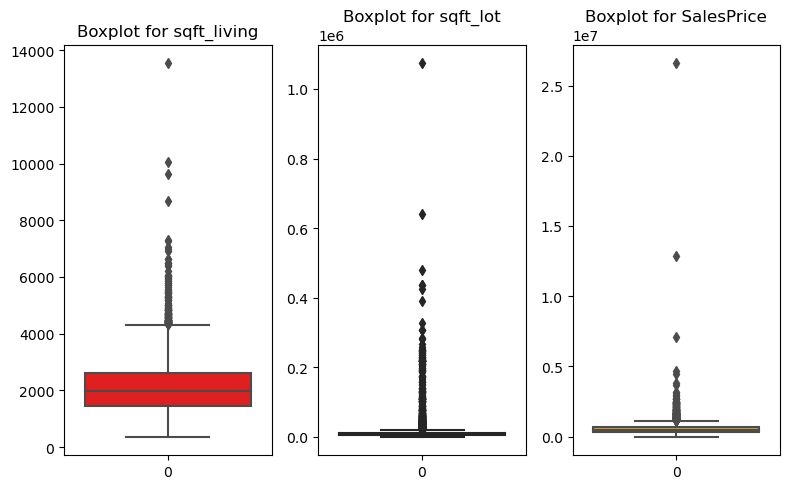

In [17]:
fig, axs = plt.subplots(1,3, figsize = (8,5))
plt1 = sns.boxplot(house_price['sqft_living'], ax = axs[0], color = 'red')
axs[0].set_title('Boxplot for sqft_living')
plt2 = sns.boxplot(house_price['sqft_lot'], ax = axs[1], color = 'green')
axs[1].set_title('Boxplot for sqft_lot')
plt3 = sns.boxplot(house_price['SalesPrice'], ax = axs[2], color = 'orange')
axs[2].set_title('Boxplot for SalesPrice')

plt.tight_layout()

#### We see a lot of outliers for all the numerical fields. We will need to treat the outliers before proceeding with our analysis

In [18]:
# Outlier Treatment

OutlierFields = ['SalesPrice', 'sqft_lot', 'sqft_living']

def handleOutliers(dataframe, field, inplace=False):
    outcome = dataframe[field]
    
    qtr1, qtr3 = outcome.quantile([0.25, 0.75])
    interQR = qtr3 - qtr1
    RangeUpper = qtr3 + 1.5 * interQR
    RangeLower = qtr1 - 1.5 * interQR
    Inds = (outcome[(outcome > RangeUpper) | (outcome < RangeLower)]).index
    if not inplace:
        return outcome.replace(outcome[Inds].values, np.nan)
    return outcome.replace(outcome[Inds].values, np.nan, inplace=True)

# We will replace the outliers with means
OutlierMeans = house_price[OutlierFields].mean()
for i in OutlierFields:
    handleOutliers(house_price, i, inplace=True)
house_price.fillna(OutlierMeans, inplace=True)
house_price.isnull().sum().sum()

0

In [19]:
house_price.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,SalesPrice
0,5/2/14 0:00,3,1,1340.00,7912.00,1,0,0,3,1340,0,1955,2005,313000.00
1,5/2/14 0:00,5,2,3650.00,9050.00,2,0,4,5,3370,280,1921,0,557905.90
2,5/2/14 0:00,3,2,1930.00,11947.00,1,0,0,4,1930,0,1966,0,342000.00
3,5/2/14 0:00,3,2,2000.00,8030.00,1,0,0,4,1000,1000,1963,0,420000.00
4,5/2/14 0:00,4,2,1940.00,10500.00,1,0,0,4,1140,800,1976,1992,550000.00


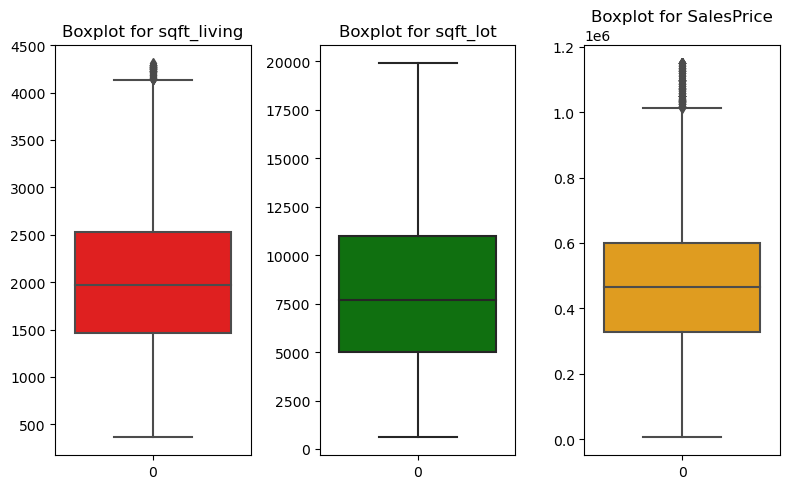

In [20]:
fig, axs = plt.subplots(1,3, figsize = (8,5))
plt1 = sns.boxplot(house_price['sqft_living'], ax = axs[0], color = 'red')
axs[0].set_title('Boxplot for sqft_living')
plt2 = sns.boxplot(house_price['sqft_lot'], ax = axs[1], color = 'green')
axs[1].set_title('Boxplot for sqft_lot')
plt3 = sns.boxplot(house_price['SalesPrice'], ax = axs[2], color = 'orange')
axs[2].set_title('Boxplot for SalesPrice')

plt.tight_layout()

In [21]:
numerical_fields = ["sqft_living", "sqft_lot", "floors", "SalesPrice"]

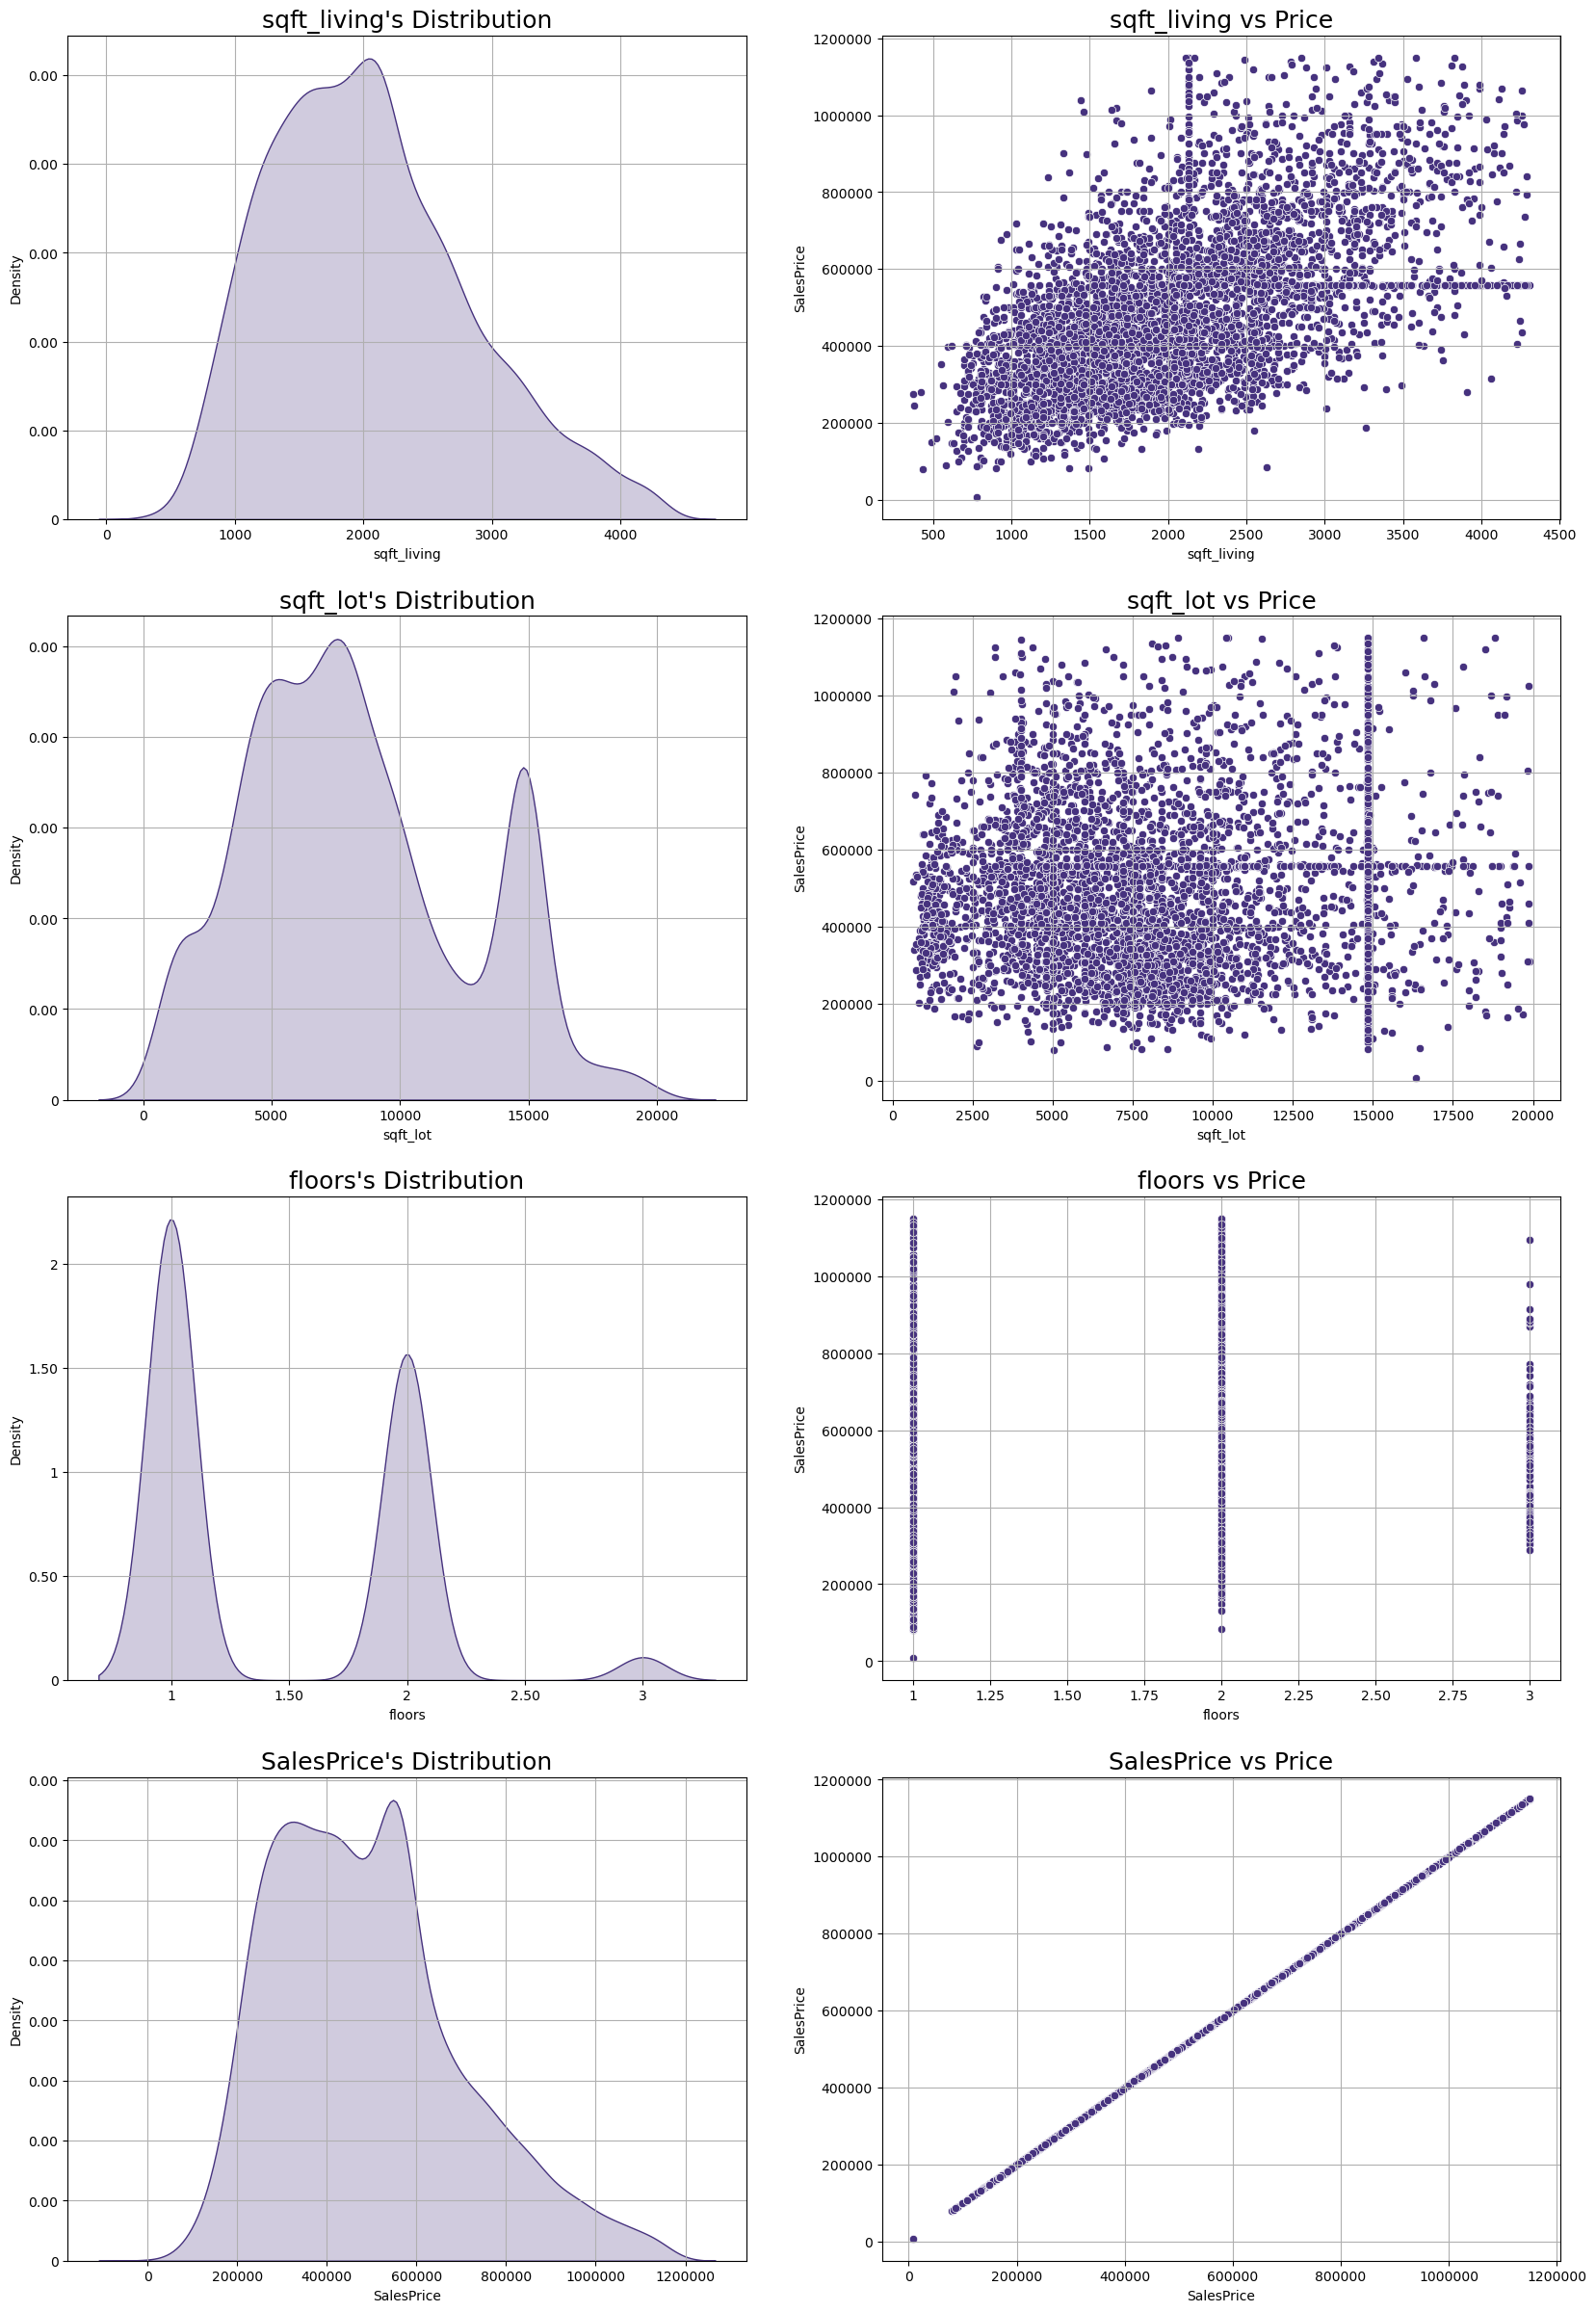

In [22]:
from matplotlib.ticker import FuncFormatter

def format_ticks(x, pos):
    """Format tick labels without exponential notation."""
    if x == int(x):
        return f"{int(x)}"
    else:
        return f"{x:.2f}"
    
def distributions_numeric(df, feature):
    ax = sns.kdeplot(df[feature], fill=True)
    plt.grid(True)
    ax.set_title(f'{feature}\'s Distribution', fontdict={'fontsize': 18})
    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

def scatter_numeric(df, feature):
    ax = sns.scatterplot(data=df, x=feature, y='SalesPrice')
    ax.set_title(f'{feature} vs Price', fontdict={'fontsize': 18})
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.figure(figsize=(20, 30))

# palettes = ['autumn', 'cool']
for i, feature in enumerate(numerical_fields):
    sns.set_palette('viridis')

    plt.subplot(len(numerical_fields), 2, i+i+1)
    distributions_numeric(house_price, feature)

    plt.subplot(len(numerical_fields), 2, i+i +2)
    scatter_numeric(house_price, feature)
    
plt.show()

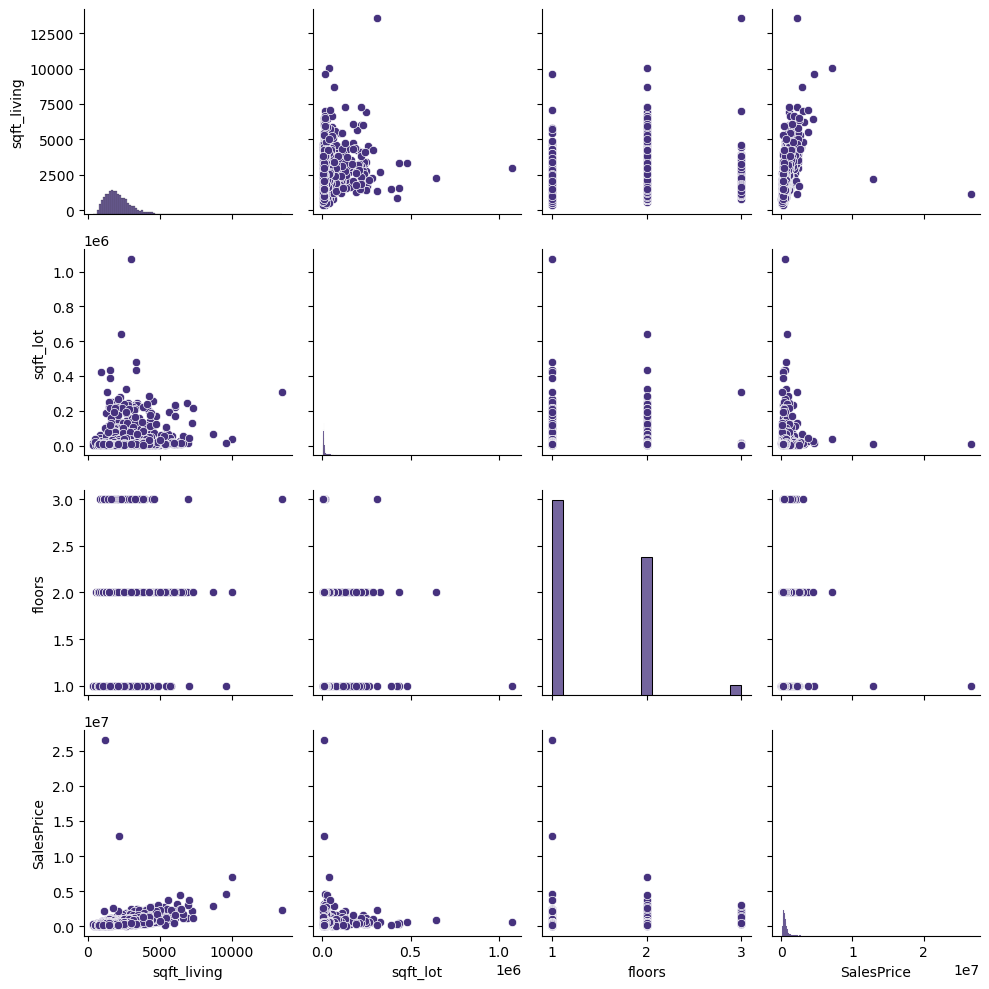

In [23]:
# Calculate the correlation matrix
#correlation_matrix = features_to_visualize.corr()

# Create a pair plot with scatterplots and histograms
sns.pairplot(features_to_visualize)
plt.tight_layout()
plt.show()

#### Plotting CoRelation Matrix

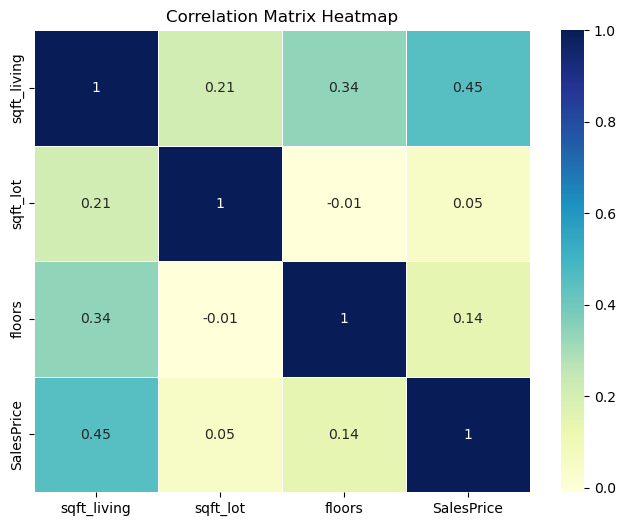

In [24]:
correlation_matrix = features_to_visualize.corr().round(2)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap ='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Linear Regression (Single Variable)

#### 6. Implement your own linear regression model using the "sqft_lot" feature as the independent variable and "SalePrice" as the target variable. Print coef and intercept.

In [25]:
sq_lot_vs_sal_Price = house_price[['sqft_lot','SalesPrice']]
sq_lot_vs_sal_Price

,sqft_lot,SalesPrice
0,7912.00,313000.00
1,9050.00,557905.90
2,11947.00,342000.00
3,8030.00,420000.00
4,10500.00,550000.00
...,...,...
4595,6360.00,308166.67
4596,7573.00,534333.33
4597,7014.00,416904.17
4598,6630.00,203400.00


In [26]:
X = sq_lot_vs_sal_Price['sqft_lot']
y = sq_lot_vs_sal_Price['SalesPrice']


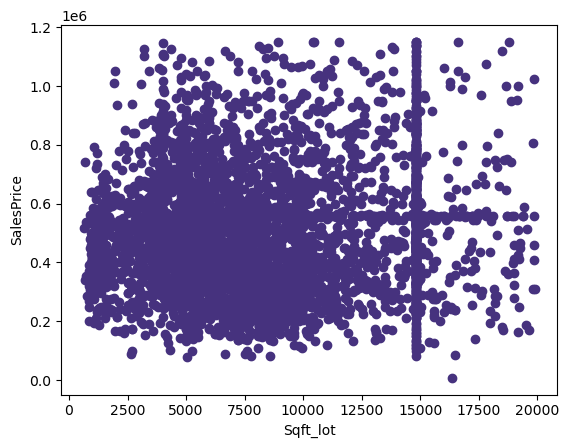

In [27]:
plt.scatter(X,y)
plt.xlabel("Sqft_lot")
plt.ylabel("SalesPrice")
plt.show()

Coefficient (slope): 5.1754549959776845
Intercept: 448212.7471054414


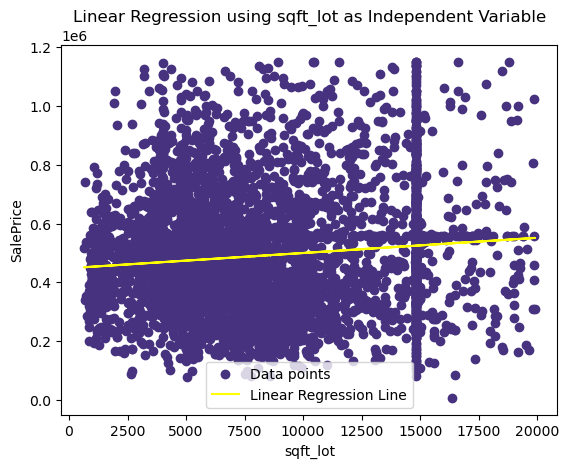

In [28]:


# Calculate the mean of X and y
mean_X = np.mean(X)
mean_y = np.mean(y)

# Calculate the slope (m) and y-intercept (b)
slope = np.sum((X - mean_X) * (y - mean_y)) / np.sum((X - mean_X)**2)
intercept = mean_y - slope * mean_X

# Print the coefficients (slope and intercept)
print(f"Coefficient (slope): {slope}")
print(f"Intercept: {intercept}")

# Predicted values based on the linear regression equation
y_pred = slope * X + intercept

# Plot the data points and the regression line
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='yellow', label='Linear Regression Line')
plt.xlabel('sqft_lot')
plt.ylabel('SalePrice')
plt.title('Linear Regression using sqft_lot as Independent Variable')
plt.legend()
plt.show()


#### 7. Calculate the sum of squared errors for your model.

In [29]:
SSE = np.sum((y - y_pred)**2)
print(f"The sum of squared error for this model is: {SSE}")

The sum of squared error for this model is: 199365266510742.5


#### 9. Use the LinearRegression function from sklearn.linear_model library and compare the coef and intercept with your model.

In [30]:
X = np.array(X).reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [31]:
intercept = lr.intercept_
print(f"Value of Intercept using sklearn Library: {intercept}")

Value of Intercept using sklearn Library: 448212.74710544135


In [32]:
slope = lr.coef_
print(f"Value of Slope using sklearn Library: {slope}")

Value of Slope using sklearn Library: [5.175455]


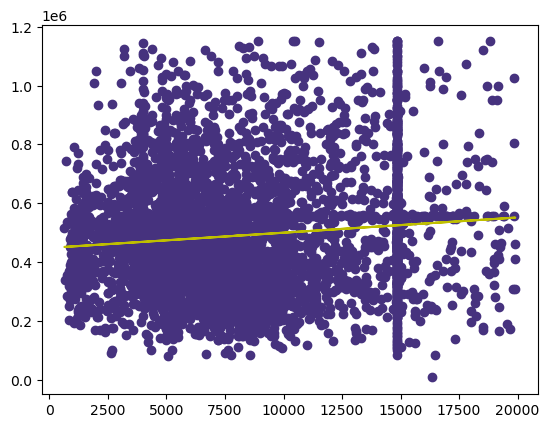

In [33]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X), c='y')

In [34]:
r2_score(y,y_pred)

0.010998928336150127

### Linear Regression (Multivariate)

#### 10. Use the LinearRegression function from sklearn.linear_model library to include multiple features sqft_living, sqft_lot and print the coef and intercept.

In [35]:
mult_reg = house_price[['sqft_living','sqft_lot','SalesPrice']]
mult_reg

,sqft_living,sqft_lot,SalesPrice
0,1340.00,7912.00,313000.00
1,3650.00,9050.00,557905.90
2,1930.00,11947.00,342000.00
3,2000.00,8030.00,420000.00
4,1940.00,10500.00,550000.00
...,...,...,...
4595,1510.00,6360.00,308166.67
4596,1460.00,7573.00,534333.33
4597,3010.00,7014.00,416904.17
4598,2090.00,6630.00,203400.00


In [36]:
Xm = mult_reg.drop(columns = 'SalesPrice')
ym = mult_reg['SalesPrice']

In [37]:
lrm = LinearRegression()
lrm.fit(Xm,ym)

LinearRegression()

In [38]:
intercept = lrm.intercept_
print(f"Value of Intercept using sklearn Library: {intercept}")

Value of Intercept using sklearn Library: 184534.3388929625


In [39]:
slope = lrm.coef_
print(f"Value of Slope using sklearn Library: {slope}")

Value of Slope using sklearn Library: [167.14017408  -4.25654289]


In [40]:
ym_pred = slope[0]*Xm.iloc[:,0] + slope[1]*Xm.iloc[:,1] + intercept


In [41]:
# Using the function predict directly from sklearn library which does the same as above
ym_pred = lrm.predict(Xm)
ym_pred

array([374824.40481096, 756074.26112465, 456261.95695529, ...,
       657770.87103864, 505636.42335569, 399086.68777368])

#### if we put y in x direction and y_pred in the Y direction, we can actually see how good is the prediction

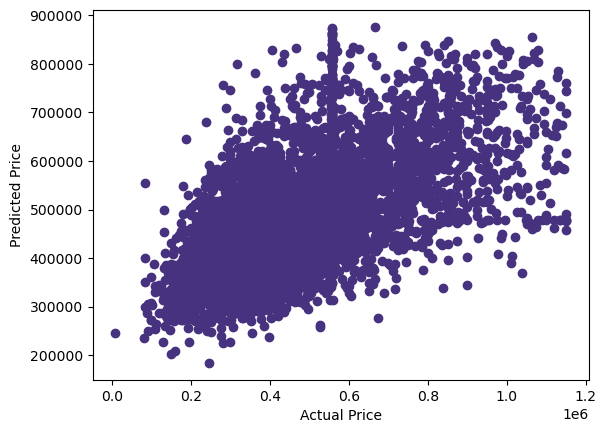

In [42]:
plt.scatter(ym,ym_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

#### 11. Print R-squared (R²) score. - to know how much prediction is good and how much is not that good

In [43]:
r2_score(ym,ym_pred)

0.351641319151651

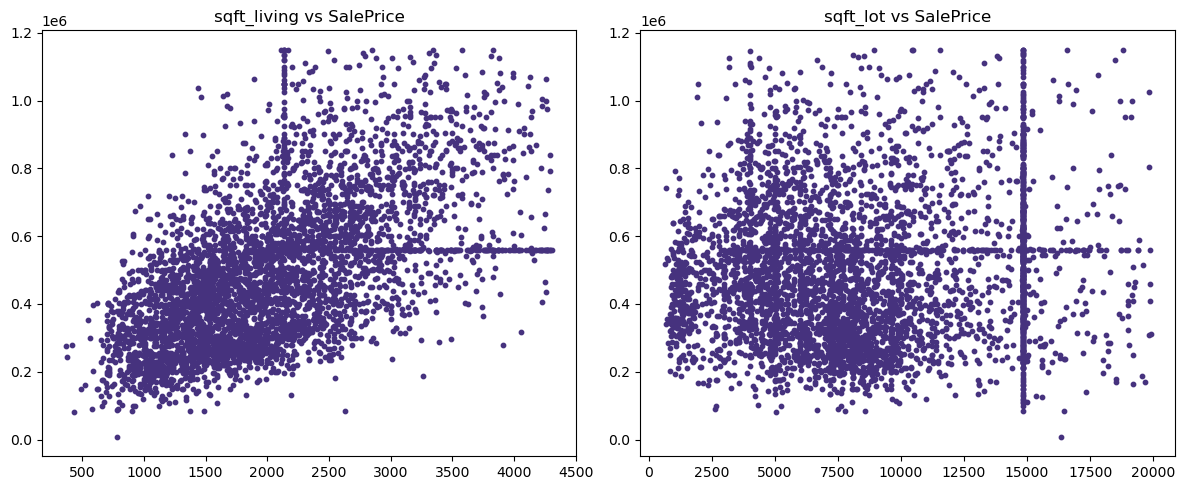

In [44]:
import matplotlib.pyplot as plt

# Scatter plot 
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(Xm['sqft_living'], ym, marker='o', s=10)
axs[0].set_title('sqft_living vs SalePrice')

axs[1].scatter(Xm['sqft_lot'], ym, marker='o', s=10)
axs[1].set_title('sqft_lot vs SalePrice')

plt.tight_layout()
plt.show()



/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


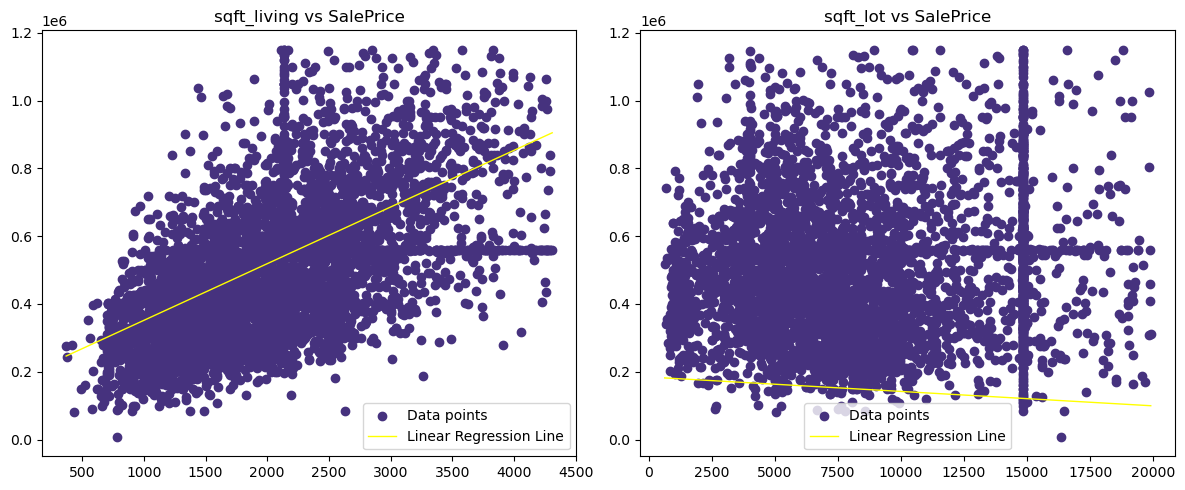

In [45]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Scatter plot 
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(Xm['sqft_living'], ym, label='Data points')
axs[0].set_title('sqft_living vs SalePrice')

axs[1].scatter(Xm['sqft_lot'], ym, label='Data points')
axs[1].set_title('sqft_lot vs SalePrice')

# Fit linear regression model on both features
model = LinearRegression()
model.fit(Xm[['sqft_living', 'sqft_lot']], ym)

# Plot the combined regression line on each chart
x_range_living = np.linspace(Xm['sqft_living'].min(), Xm['sqft_living'].max(), 100).reshape(-1, 1)
x_range_lot = np.linspace(Xm['sqft_lot'].min(), Xm['sqft_lot'].max(), 100).reshape(-1, 1)

# Plot for sqft_living
axs[0].plot(x_range_living, model.predict(np.column_stack((x_range_living, np.zeros_like(x_range_living)))), color='yellow', linewidth=1, label='Linear Regression Line')

# Plot for sqft_lot
axs[1].plot(x_range_lot, model.predict(np.column_stack((np.zeros_like(x_range_lot), x_range_lot))), color='yellow', linewidth=1, label='Linear Regression Line')

# Add legend
axs[0].legend()
axs[1].legend()

plt.tight_layout()
plt.show()

#### 12. Visualize the relationships between the selected features and SalePrice.

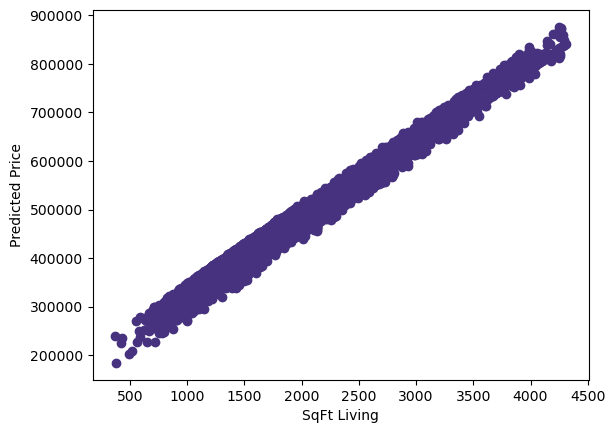

In [46]:
plt.scatter(Xm['sqft_living'],ym_pred)
plt.xlabel("SqFt Living")
plt.ylabel("Predicted Price")
plt.show()

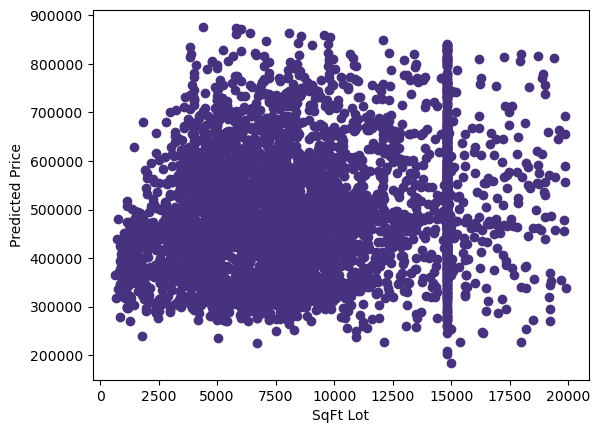

In [47]:
plt.scatter(Xm['sqft_lot'],ym_pred)
plt.xlabel("SqFt Lot")
plt.ylabel("Predicted Price")
plt.show()

In [48]:
# if I try splitting X,y to train and test data and then use the linear regresion
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(Xm,ym, test_size = 0.3, random_state = 0)

In [49]:
lrm1 = LinearRegression()
lrm1.fit(X_train,y_train)

LinearRegression()

In [50]:
c = lrm1.intercept_
c

180896.2061074752

In [51]:
m = lrm1.coef_
m

array([170.64389418,  -4.97417284])

In [52]:
y_pred_train = lrm1.predict(X_train)
y_pred_train

array([519045.97274216, 322801.41323471, 598223.03042837, ...,
       470231.14043671, 630979.71144299, 429048.60084108])

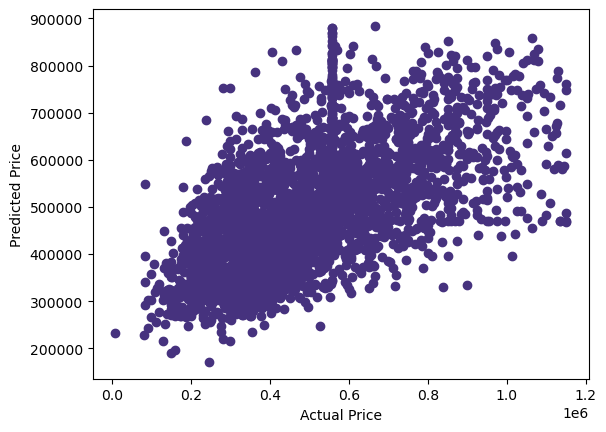

In [53]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [54]:
r2_score(y_train,y_pred_train)

0.36213197914198514

In [55]:
## Now lets test our model on testing data

In [56]:
y_pred_test = lrm1.predict(X_test)
y_pred_test

array([363499.28844196, 620370.13151317, 525317.89539128, ...,
       605336.09758764, 492821.15454641, 363112.49359319])

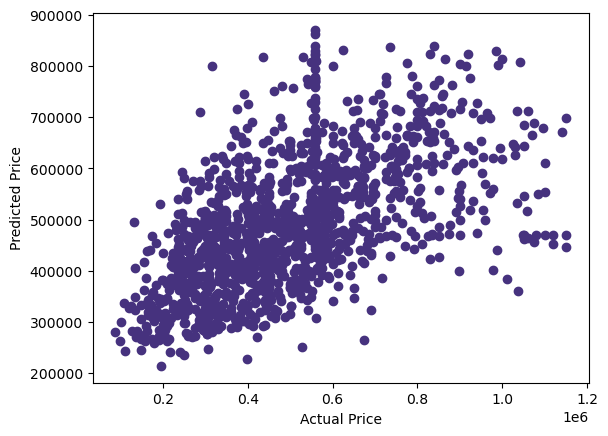

In [57]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [58]:
r2_score(y_test,y_pred_test)

0.3243869776895828

### Polynomial Regression

#### 13. Use a polynomial feature's function and implement a polynomial regression model of degree 2 for the features sqft_lot and the target variable.

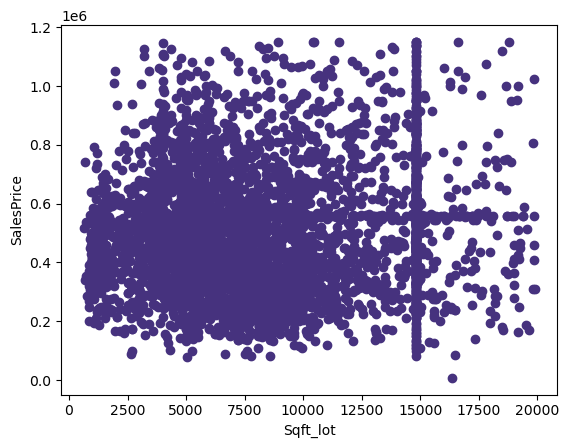

In [59]:
plt.scatter(X,y)
plt.xlabel("Sqft_lot")
plt.ylabel("SalesPrice")
plt.show()

[7912.]
[1.0000000e+00 7.9120000e+03 6.2599744e+07]


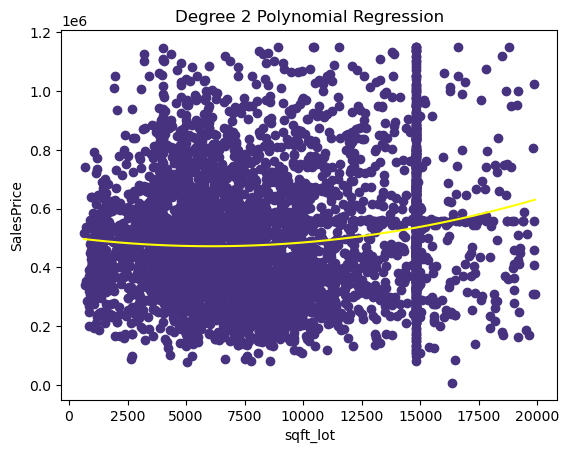

In [60]:

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

print(X[0])
print(X_poly[0])

# Create and fit the model
lin = LinearRegression()
lin.fit(X_poly, y)

# Plot the model
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_plot = lin.predict(poly.transform(X_plot))

plt.scatter(X, y)
plt.plot(X_plot, y_plot, color='yellow')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.title('Degree 2 Polynomial Regression')

plt.show()

#### 14. Print R-squared (R²) score.

In [61]:
y_pred = lin.predict(X_poly)

r2 = r2_score(y, y_pred) 
print('R-squared:', r2)

R-squared: 0.017081363421671214


#### 15. Experiment with different polynomial degrees and find the best fit as per your perspective.

In [62]:
## Let's try for degree 3 and 4, and print its R2 score

for degree in [2, 3, 4]:

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    lint = LinearRegression()
    lint.fit(X_poly, y)
    
    y_pred = lint.predict(X_poly)
    r2 = r2_score(y, y_pred)

    print(f"Degree {degree} R-squared: {r2:.3f}")

Degree 2 R-squared: 0.017
Degree 3 R-squared: 0.017
Degree 4 R-squared: 0.038


#### 16. Plot the polynomial regression curve along with the actual data points.

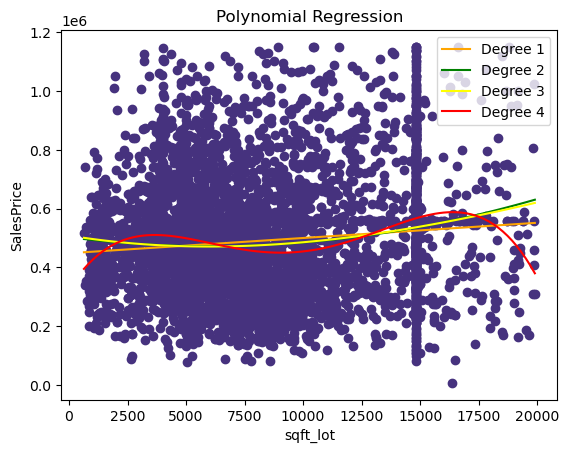

In [63]:
### Let's Plot all together

degrees = [1, 2, 3, 4]
colors = ['orange', 'green', 'yellow', 'red']

# Plot data
plt.scatter(X, y)  

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

for deg, color in zip(degrees, colors):

    poly = PolynomialFeatures(degree=deg) 
    X_poly = poly.fit_transform(X)

    lint = LinearRegression()
    lint.fit(X_poly, y)  

    y_plot = lint.predict(poly.transform(X_plot))

    plt.plot(X_plot, y_plot, c=color, label=f"Degree {deg}")

plt.legend()
plt.xlabel('sqft_lot')  
plt.ylabel('SalesPrice')
plt.title("Polynomial Regression")
plt.show()

##### We dis try degree 2, 3, 4 and we see the best r2 score only at degree 3. However, can we try to improve its score. Lets try with scaling the data, and splitting the data for train and test

In [64]:
## we will be splitting the data. We do not want to use all the data for training. 
## we will keep one portion of data set for training and another portion of 
## dataset for testing or evaluationgg the model 

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scaling the data

In [66]:
## It is advisable to do scaling of data for a better model, specially in polynomial regression

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Here in the test data, we are not doing fit_transform but only transform, standard scaler is going to compute mean and Sd of the data
#we will be using the same mean and SD to transform the test data. 
#We do not want to give any test data information to the model.

### Model Development

In [68]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lins = LinearRegression()
lins.fit(X_train_poly, y_train)

y_pred_train = lins.predict(X_train_poly)
y_pred_test = lins.predict(X_test_poly)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("R^2 Train Score:", r2_train)
print("R^2 Test Score:", r2_test)


R^2 Train Score: 0.015941856642447405
R^2 Test Score: 0.019384825775620618


In [69]:
#With the sacling also, there's not much of a difference in R2 score for degree 3, 
# since we concluded that at degree 3, we find the best model, lets see if its good model or if its overfitting or underfitting

In [70]:
## Lets find the mean absolute erropr with the unscaled data
mean_absolute_error(y_test,y_pred_test)

160935.52212295483

In [71]:
mean_absolute_error(y_train,y_pred_train)

167973.2354822835

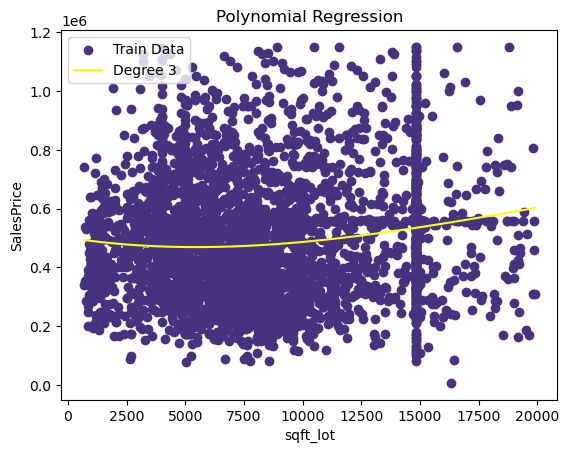

In [72]:
### Lets plot the train data

degrees = [3]
colors = ['yellow']  

#plt.figure(figsize=(10, 6)) 

# Plot data  
plt.scatter(X_train, y_train, label='Train Data')

X_plot = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1)

for deg, color in zip(degrees, colors):

    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X_train)

    model = LinearRegression() 
    model.fit(X_poly, y_train)   

    y_plot = model.predict(poly.transform(X_plot))

    plt.plot(X_plot, y_plot, c=color, label=f"Degree {deg}")

plt.legend(loc='upper left')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')  
plt.title("Polynomial Regression")
plt.show()

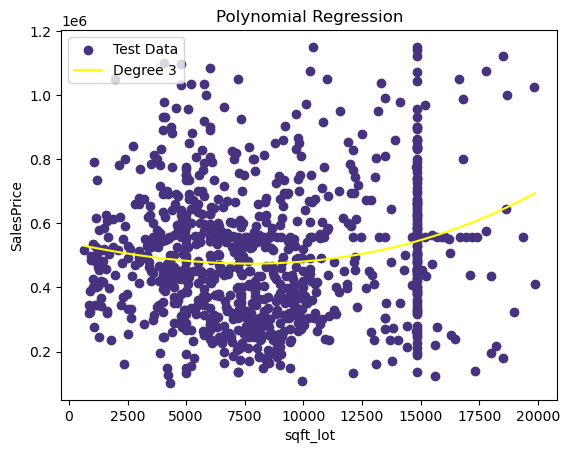

In [73]:
#Lets plot for test data

degrees = [3]
colors = ['yellow']  

#plt.figure(figsize=(10, 6)) 

# Plot data  
plt.scatter(X_test, y_test, label='Test Data')

X_plot = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)

for deg, color in zip(degrees, colors):

    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X_test)

    model = LinearRegression() 
    model.fit(X_poly, y_test)   

    y_plot = model.predict(poly.transform(X_plot))

    plt.plot(X_plot, y_plot, c=color, label=f"Degree {deg}")

plt.legend(loc='upper left')
plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')  
plt.title("Polynomial Regression")
plt.show()

### RANSAC (Robust Regression) (10 points):
    
    
#### 19. Apply RANSAC (Random Sample Consensus) to fit a robust linear regression model to the features sqft_lot and the target variable.

In [74]:
from sklearn.linear_model import RANSACRegressor

In [75]:
import pandas as pd
from sklearn.linear_model import RANSACRegressor

X = house_price[['sqft_lot']]
y = house_price[['SalesPrice']]

ransac = RANSACRegressor()
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

print("Inliers:", len(X[inlier_mask])) 
print("Outliers:", len(X[outlier_mask]))

print("Model performance:")
print("Coefficient:", ransac.estimator_.coef_)
print("Intercept:", ransac.estimator_.intercept_)
print("Score:", ransac.score(X, y))

Inliers: 2100
Outliers: 2451
Model performance:
Coefficient: [[16.476884]]
Intercept: [232596.22796127]
Score: -0.3764178062331238


/Users/eshitashitij/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RANSACRegressor was fitted with feature names
  warnings.warn(


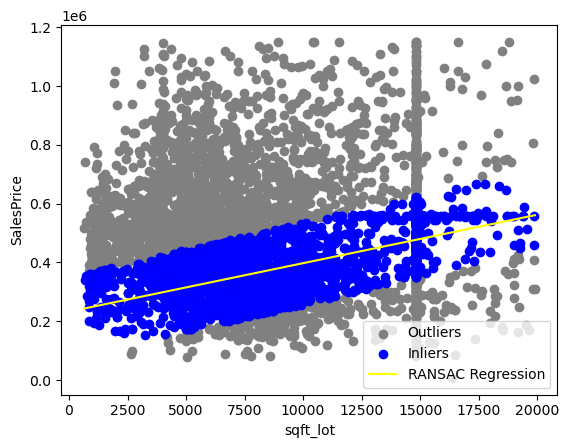

In [76]:
import matplotlib.pyplot as plt

# Plot outliers
outlier_x = X[outlier_mask]['sqft_lot']  
outlier_y = y[outlier_mask]
plt.scatter(outlier_x, outlier_y, color='grey', label='Outliers')

# Plot inliers 
inlier_x = X[inlier_mask]['sqft_lot']
inlier_y = y[inlier_mask]
plt.scatter(inlier_x, inlier_y, color='blue', label='Inliers')


# Plot regression line  
line_x = np.array([X['sqft_lot'].min(), X['sqft_lot'].max()])[:,np.newaxis]
line_y = ransac.predict(line_x) 
plt.plot(line_x, line_y, color='yellow', label='RANSAC Regression')  

plt.xlabel('sqft_lot')
plt.ylabel('SalesPrice')
plt.legend()
plt.show()

In [77]:
# R-squared on inliers
inlier_r2 = ransac.score(X[inlier_mask], y[inlier_mask])
print("R^2 score on inliers:", inlier_r2)


# R-squared on outliers
outlier_r2 = ransac.score(X[outlier_mask], y[outlier_mask])
print("R^2 score on outliers:", outlier_r2)

# R-squared on whole dataset
r2 = ransac.score(X, y)
print("R^2 score on all data:", r2)

R^2 score on inliers: 0.4189882959944393
R^2 score on outliers: -1.0663534380017978
R^2 score on all data: -0.3764178062331238


##### Thank You !!